In [157]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [158]:
### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

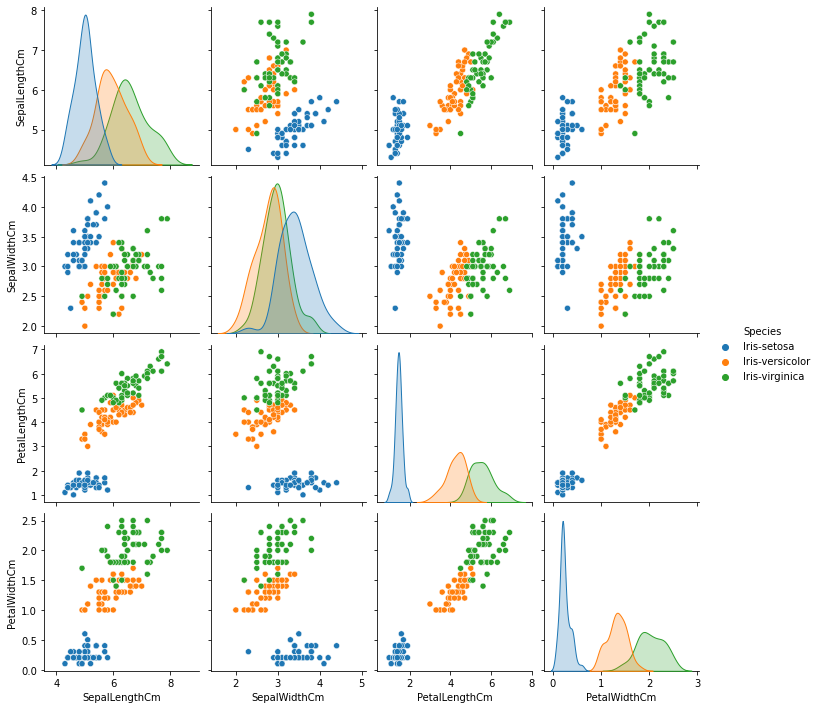

In [159]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### 1.Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).

In [160]:
def net_train(num_input = 4, num_output = 3, num_inner = 2, learn_rate = 0.01, num_epochs = 1000):
    np.random.seed(4) #фиксация "семени" для random
    w0 = 2*np.random.random((4, num_inner)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((num_inner, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    #errors = [] # массив для ошибок, чтобы потом построить график
    #errors_tr = []
    #errors_ts = []
    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * learn_rate
        w0 += layer0.T.dot(layer1_delta) * learn_rate
        # метрика модели
        error_tr = np.mean(np.abs(layer2_error))
        accuracy_tr = (1 - error_tr) * 100
        #errors_tr.append(error_tr)
    
    
        layer0_t = X_test
        layer1_t = sigmoid(np.dot(layer0_t, w0))
        layer2_t = sigmoid(np.dot(layer1_t, w1))

        layer2_t_error = y_test - layer2_t

        error_ts = np.mean(np.abs(layer2_t_error))
        accuracy_ts = (1 - error_ts) * 100
        #errors_ts.append(error_ts)
    return num_inner, learn_rate, num_epochs, accuracy_tr, accuracy_ts  
    #return errors_tr, accuracy_tr, w1, w0, layer2, layer2_t, errors_ts 
    #return errors[-1], accuracy

In [161]:
num1 = net_train(num_input = 4, num_output = 3, num_inner = 5, learn_rate = 0.5, num_epochs = 10000)
#min(num1)
num1

(5, 0.5, 10000, 99.12915304207979, 96.55307311291001)

In [162]:
num_inner_neurons = [1, 3, 5, 7, 10]
rates_learn = [0.01, 0.05, 0.1, 0.5, 1]
num_epochs = [1000, 5000, 10000, 20000, 40000, 100000]

In [164]:
params_list = list(itertools.product(num_inner_neurons, rates_learn, num_epochs))
columns = ['num_inner', 'learn_rate', 'num_epochs', 'accuracy_tr', 'accuracy_ts']
df_rezult = pd.DataFrame(rez_list, columns = columns)
#df_rezult['eff_num_inner'] = df_rezult.accuracy_ts / df_rezult.num_inner
#df_rezult['eff_learn_rate'] = df_rezult.accuracy_ts / df_rezult.learn_rate
#df_rezult['eff_num_epochs'] = df_rezult.accuracy_ts / df_rezult.num_epochs
df_rezult.sample(5)
#params_list

,num_inner,learn_rate,num_epochs,accuracy_tr,accuracy_ts
18,1,0.50,20000,69.450675,66.722137
25,3,0.01,1000,75.736917,73.662194
34,3,0.05,40000,98.097667,97.507231
80,7,0.05,1000,87.021924,87.631077
24,1,1.00,40000,66.982639,68.943996


In [165]:
#%%time
rez_list = []

for i in range(len(params_list)):
    #print(params_list[i][0])
    #print(params_list[i][1])
    #print(params_list[i][2])
    rez_net = net_train(num_input = 4, num_output = 3,
                        num_inner = params_list[i][0],
                        learn_rate = params_list[i][1],
                        num_epochs = params_list[i][2])
    rez_list.append(rez_net)

In [166]:
rez_list[0:5]

[(1, 0.01, 1000, 55.88525722610671, 54.84085608478526),
 (1, 0.01, 5000, 62.99579992189884, 59.04766561166181),
 (1, 0.01, 10000, 64.93924189216429, 60.37589686083766),
 (1, 0.01, 20000, 66.28792982780287, 61.37349383389504),
 (1, 0.01, 40000, 67.18425242615295, 62.00962206315279)]

In [167]:
columns = ['num_inner', 'learn_rate', 'num_epochs', 'accuracy_tr', 'accuracy_ts']
df_rezult = pd.DataFrame(rez_list, columns = columns)
#df_rezult['eff_num_inner'] = df_rezult.accuracy_ts / df_rezult.num_inner
#df_rezult['eff_learn_rate'] = df_rezult.accuracy_ts / df_rezult.learn_rate
#df_rezult['eff_num_epochs'] = df_rezult.accuracy_ts / df_rezult.num_epochs
df_rezult.sample(5)

,num_inner,learn_rate,num_epochs,accuracy_tr,accuracy_ts
33,3,0.01,20000,96.093030,94.485814
78,5,0.50,1000,97.643841,95.955924
39,3,0.05,20000,98.263018,96.012966
6,1,0.05,1000,63.020754,59.065608
99,7,0.05,20000,98.500811,96.199353


In [168]:
df_rezult.describe()

,num_inner,learn_rate,num_epochs,accuracy_tr,accuracy_ts
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.200000,0.332000,29333.333333,90.478245,87.686061
std,3.134566,0.378485,34181.054972,12.695652,13.603026
min,1.000000,0.010000,1000.000000,55.885257,54.840856
25%,3.000000,0.050000,5000.000000,87.577500,84.009559
50%,5.000000,0.100000,15000.000000,97.790410,95.799666
75%,7.000000,0.500000,40000.000000,99.083617,96.367994
max,10.000000,1.000000,100000.000000,99.306570,96.713398


In [190]:
X = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 1000)]['num_inner']
X.head()

18      1
48      3
78      5
108     7
138    10
Name: num_inner, dtype: int64

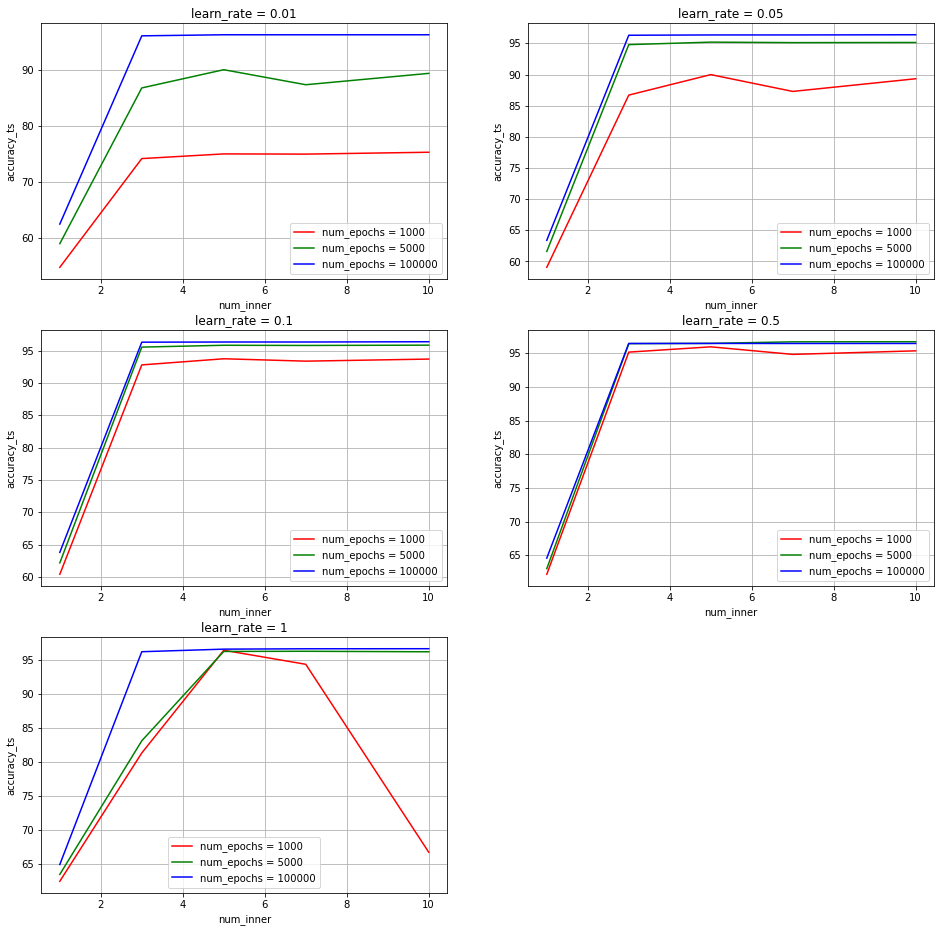

In [252]:
# для картинки

plt.figure(figsize =(16,16))
plt.subplot(3,2,1).set(title='learn_rate = 0.01')
X = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 1000)]['num_inner']
Y = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 1000)]['accuracy_ts']

X2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 5000)]['num_inner']
Y2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 5000)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 100000)]['num_inner']
Y3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.01) & (df_rezult['num_epochs'] == 100000)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_epochs = 1000')
plt.plot(X2 ,Y2,'-g',label = 'num_epochs = 5000')
plt.plot(X3 ,Y3,'-b',label = 'num_epochs = 100000')
plt.grid('On')
plt.legend()
plt.xlabel('num_inner')
plt.ylabel('accuracy_ts')


plt.subplot(3,2,2).set(title='learn_rate = 0.05')
X = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 1000)]['num_inner']
Y = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 1000)]['accuracy_ts']


X2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 5000)]['num_inner']
Y2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 5000)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 100000)]['num_inner']
Y3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.05) & (df_rezult['num_epochs'] == 100000)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_epochs = 1000')
plt.plot(X2 ,Y2,'-g',label = 'num_epochs = 5000')
plt.plot(X3 ,Y3,'-b',label = 'num_epochs = 100000')
plt.grid('On')
plt.legend()
plt.xlabel('num_inner')
plt.ylabel('accuracy_ts')


plt.subplot(3,2,3).set(title='learn_rate = 0.1')
X = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 1000)]['num_inner']
Y = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 1000)]['accuracy_ts']

X2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 5000)]['num_inner']
Y2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 5000)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 100000)]['num_inner']
Y3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.1) & (df_rezult['num_epochs'] == 100000)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_epochs = 1000')
plt.plot(X2 ,Y2,'-g',label = 'num_epochs = 5000')
plt.plot(X3 ,Y3,'-b',label = 'num_epochs = 100000')
plt.grid('On')
plt.legend()
plt.xlabel('num_inner')
plt.ylabel('accuracy_ts')


plt.subplot(3,2,4).set(title='learn_rate = 0.5')
X = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 1000)]['num_inner']
Y = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 1000)]['accuracy_ts']


X2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 5000)]['num_inner']
Y2 = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 5000)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 100000)]['num_inner']
Y3 = df_rezult.loc[(df_rezult['learn_rate'] == 0.5) & (df_rezult['num_epochs'] == 100000)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_epochs = 1000')
plt.plot(X2 ,Y2,'-g',label = 'num_epochs = 5000')
plt.plot(X3 ,Y3,'-b',label = 'num_epochs = 100000')
plt.grid('On')
plt.legend()
plt.xlabel('num_inner')
plt.ylabel('accuracy_ts')


plt.subplot(3,2,5).set(title = 'learn_rate = 1')
X = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 1000)]['num_inner']
Y = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 1000)]['accuracy_ts']


X2 = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 5000)]['num_inner']
Y2 = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 5000)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 100000)]['num_inner']
Y3 = df_rezult.loc[(df_rezult['learn_rate'] == 1) & (df_rezult['num_epochs'] == 100000)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_epochs = 1000')
plt.plot(X2 ,Y2,'-g',label = 'num_epochs = 5000')
plt.plot(X3 ,Y3,'-b',label = 'num_epochs = 100000')
plt.grid('On')
plt.legend()
plt.xlabel('num_inner')
plt.ylabel('accuracy_ts')

plt.show()

#### Лучших показателей accuracy достигает при количестве нейронов > 3 и скорости обучения в диапазоне 0.1 - 0.5, количестве эпох > 5000. При прилижении скорости обучения к 1, наблюдается падение точности (accuracy) .

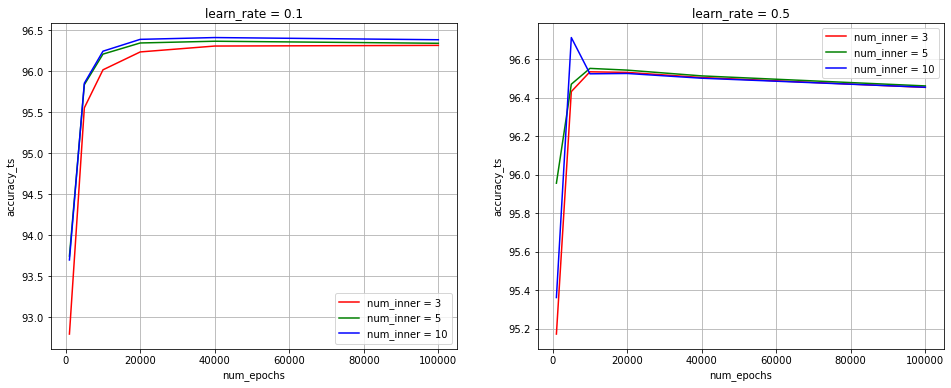

In [264]:
# для картинки

plt.figure(figsize =(16,6))
plt.subplot(1,2,1).set(title = 'learn_rate = 0.1')
X = df_rezult.loc[(df_rezult['num_inner'] == 3) & (df_rezult['learn_rate'] == 0.1)]['num_epochs']
Y = df_rezult.loc[(df_rezult['num_inner'] == 3) & (df_rezult['learn_rate'] == 0.1)]['accuracy_ts']

X2 = df_rezult.loc[(df_rezult['num_inner'] == 5) & (df_rezult['learn_rate'] == 0.1)]['num_epochs']
Y2 = df_rezult.loc[(df_rezult['num_inner'] == 5) & (df_rezult['learn_rate'] == 0.1)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['num_inner'] == 10) & (df_rezult['learn_rate'] == 0.1)]['num_epochs']
Y3 = df_rezult.loc[(df_rezult['num_inner'] == 10) & (df_rezult['learn_rate'] == 0.1)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_inner = 3')
plt.plot(X2 ,Y2,'-g',label = 'num_inner = 5')
plt.plot(X3 ,Y3,'-b',label = 'num_inner = 10')
plt.grid('On')
plt.legend()
plt.xlabel('num_epochs')
plt.ylabel('accuracy_ts')


plt.subplot(1,2,2).set(title = 'learn_rate = 0.5')
X = df_rezult.loc[(df_rezult['num_inner'] == 3) & (df_rezult['learn_rate'] == 0.5)]['num_epochs']
Y = df_rezult.loc[(df_rezult['num_inner'] == 3) & (df_rezult['learn_rate'] == 0.5)]['accuracy_ts']

X2 = df_rezult.loc[(df_rezult['num_inner'] == 5) & (df_rezult['learn_rate'] == 0.5)]['num_epochs']
Y2 = df_rezult.loc[(df_rezult['num_inner'] == 5) & (df_rezult['learn_rate'] == 0.5)]['accuracy_ts']

X3 = df_rezult.loc[(df_rezult['num_inner'] == 10) & (df_rezult['learn_rate'] == 0.5)]['num_epochs']
Y3 = df_rezult.loc[(df_rezult['num_inner'] == 10) & (df_rezult['learn_rate'] == 0.5)]['accuracy_ts']

plt.plot(X ,Y,'-r',label = 'num_inner = 3')
plt.plot(X2 ,Y2,'-g',label = 'num_inner = 5')
plt.plot(X3 ,Y3,'-b',label = 'num_inner = 10')
plt.grid('On')
plt.legend()
plt.xlabel('num_epochs')
plt.ylabel('accuracy_ts')


plt.show()

#### При одновременном увеличении количества нейронов и эпох наступает переобучение. При количестве нейронов > 5, ~ после 5000 эпох, при количестве нейронов  до 5   включительно - после 10000 эпох.
